In [3]:
#coding:utf8
import matplotlib
import os
if 'DISPLAY' not in os.environ:
    matplotlib.use('Agg')
else:
    pass
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy
from utils import Predicate,Clause,KnowledgeBase, Propositional
from utils import load_knowledge_base,load_propositional
from models import LTN
import pickle
import numpy as np
import seaborn as sns
sns.set(style="white", context="talk")
from utils import get_DF,show_learned_propositionals

In [4]:
emb_dim=30

# Terms

* variable
* function
* predicate
* clause

In [5]:
def show_results(model, knowledge_base):
    wrong=0
    for clause in knowledge_base.clauses:
        output=model.forward(clause=clause)
        if output[0].data.numpy()[0]<0.1:
            continue
        print(clause.show())
        print(output[0].data.numpy()[0], output[1].data.numpy()[0])
        wrong+=1
    print(wrong)

In [9]:
kb1=load_knowledge_base('./facts1.txt')
kb2=load_knowledge_base('./facts2.txt')
propositionals=load_propositional('./knowledge.txt')
gkbs1=[]
for p in propositionals:
    gkbs1.append(p.generate_knowledge_base('abcdefgh',change_weight=False))
gkb1=gkbs1[0]
for tkb in gkbs1[1:]:
    gkb1=gkb1.union(tkb)
gkbs2=[]
for p in propositionals:
    gkbs2.append(p.generate_knowledge_base('ijklmn',change_weight=False))
gkb2=gkbs2[0]
for tkb in gkbs2[1:]:
    gkb2=gkb2.union(tkb)

gkbs3=[]
for p in propositionals:
    gkbs3.append(p.generate_knowledge_base('abcdefgh',change_weight=True))
gkb3=gkbs3[0]
for tkb in gkbs3[1:]:
    gkb3=gkb3.union(tkb)
gkbs4=[]
for p in propositionals:
    gkbs4.append(p.generate_knowledge_base('ijklmn',change_weight=True))
gkb4=gkbs4[0]
for tkb in gkbs4[1:]:
    gkb4=gkb4.union(tkb)

  0%|          | 0/2000 [00:00<?, ?it/s]

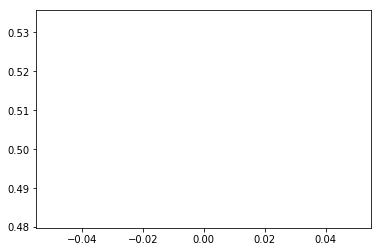

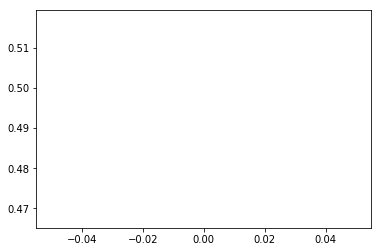

S(a)
[ 0.52074254] [ 0.47925749]
S(e)
[ 0.45371383] [ 0.54628617]
S(f)
[ 0.29024565] [ 0.70975435]
S(g)
[ 0.32669449] [ 0.67330551]
¬S(b)
[ 0.59278917] [ 0.40721083]
¬S(c)
[ 0.39564252] [ 0.60435748]
¬S(d)
[ 0.42731106] [ 0.57268894]
¬S(g)
[ 0.67330551] [ 0.32669449]
¬S(h)
[ 0.49770832] [ 0.50229168]
F(a, b)
[ 0.64378875] [ 0.35621125]
F(a, e)
[ 0.5163157] [ 0.48368433]
F(a, f)
[ 0.30382574] [ 0.69617426]
F(a, g)
[ 0.33311474] [ 0.66688526]
F(b, c)
[ 0.53307378] [ 0.46692622]
F(c, d)
[ 0.52255082] [ 0.47744915]
F(e, f)
[ 0.31328017] [ 0.68671983]
F(g, h)
[ 0.56296575] [ 0.43703428]
¬F(a, c)
[ 0.50580752] [ 0.49419248]
¬F(a, d)
[ 0.46592546] [ 0.53407454]
¬F(a, h)
[ 0.46030641] [ 0.53969359]
¬F(b, d)
[ 0.44076109] [ 0.55923891]
¬F(b, e)
[ 0.22165942] [ 0.77834058]
¬F(b, f)
[ 0.24241602] [ 0.75758398]
¬F(b, g)
[ 0.30762708] [ 0.69237292]
¬F(b, h)
[ 0.24716884] [ 0.75283116]
¬F(c, e)
[ 0.39018887] [ 0.60981113]
¬F(c, f)
[ 0.40767211] [ 0.59232789]
¬F(c, g)
[ 0.31399763] [ 0.68600237]
¬F(c

  0%|          | 1/2000 [00:01<56:57,  1.71s/it]


[ 0.47694433] [ 0.52305567]
C(e)
[ 0.31463104] [ 0.68536896]
¬C(b)
[ 0.35794222] [ 0.64205778]
¬C(c)
[ 0.58622527] [ 0.41377473]
¬C(d)
[ 0.17006052] [ 0.82993948]
¬C(f)
[ 0.43690741] [ 0.56309259]
¬C(g)
[ 0.19716859] [ 0.80283141]
¬C(h)
[ 0.44917727] [ 0.55082273]
S(i)
[ 0.5230841] [ 0.4769159]
S(n)
[ 0.34972245] [ 0.65027755]
¬S(j)
[ 0.26043153] [ 0.73956847]
¬S(k)
[ 0.36447251] [ 0.63552749]
¬S(l)
[ 0.48147619] [ 0.51852381]
¬S(m)
[ 0.345456] [ 0.654544]
F(i, j)
[ 0.69963455] [ 0.30036542]
F(i, m)
[ 0.46883315] [ 0.53116685]
F(k, l)
[ 0.42745894] [ 0.57254106]
F(m, n)
[ 0.41255796] [ 0.58744204]
¬F(i, k)
[ 0.27673805] [ 0.72326195]
¬F(i, l)
[ 0.69915283] [ 0.30084717]
¬F(i, n)
[ 0.59718156] [ 0.40281844]
¬F(j, k)
[ 0.43897432] [ 0.56102568]
¬F(j, l)
[ 0.30431944] [ 0.69568056]
¬F(j, m)
[ 0.28837645] [ 0.71162355]
¬F(j, n)
[ 0.33642507] [ 0.66357493]
¬F(l, n)
[ 0.46292984] [ 0.53707016]
¬F(k, m)
[ 0.39373678] [ 0.60626322]
¬F(l, m)
[ 0.50352591] [ 0.49647409]
65


  5%|▌         | 100/2000 [01:29<28:27,  1.11it/s]

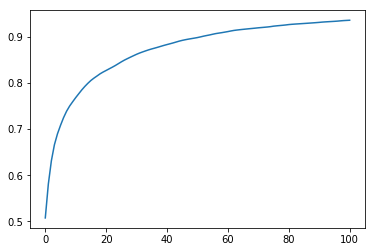

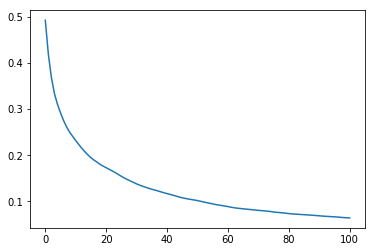

  5%|▌         | 101/2000 [01:31<28:36,  1.11it/s]

S(g)
[ 0.340168] [ 0.659832]
¬S(g)
[ 0.659832] [ 0.340168]
F(a, e)
[ 0.11869514] [ 0.88130486]
F(b, c)
[ 0.16297013] [ 0.83702987]
F(c, d)
[ 0.33958429] [ 0.66041571]
F(g, h)
[ 0.35668617] [ 0.64331383]
¬F(a, d)
[ 0.19612646] [ 0.80387354]
F(i, j)
[ 0.24730664] [ 0.75269336]
F(m, n)
[ 0.1133917] [ 0.8866083]
9


 10%|█         | 200/2000 [02:48<25:12,  1.19it/s]

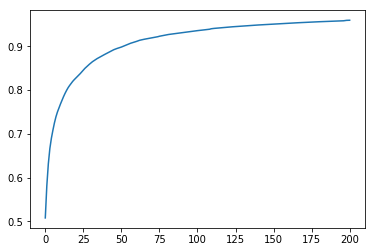

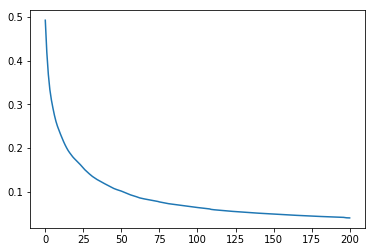

 10%|█         | 201/2000 [02:49<25:13,  1.19it/s]

S(g)
[ 0.30343813] [ 0.69656187]
¬S(g)
[ 0.69656187] [ 0.30343813]
F(b, c)
[ 0.10612464] [ 0.89387536]
F(c, d)
[ 0.18995041] [ 0.81004959]
F(g, h)
[ 0.19293141] [ 0.80706859]
¬F(a, d)
[ 0.17222869] [ 0.82777131]
F(i, j)
[ 0.16181344] [ 0.83818656]
7


 15%|█▌        | 300/2000 [04:04<23:06,  1.23it/s]

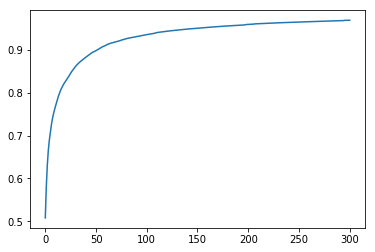

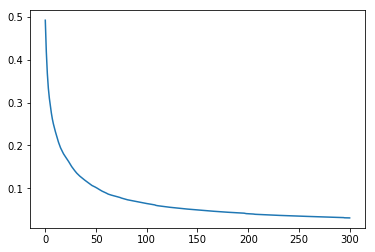

 15%|█▌        | 301/2000 [04:05<23:07,  1.22it/s]

S(g)
[ 0.27820343] [ 0.72179657]
¬S(g)
[ 0.72179657] [ 0.27820343]
F(c, d)
[ 0.13729167] [ 0.86270833]
¬F(a, d)
[ 0.14674854] [ 0.85325146]
F(i, j)
[ 0.11413932] [ 0.88586068]
5


 20%|██        | 400/2000 [05:09<20:38,  1.29it/s]

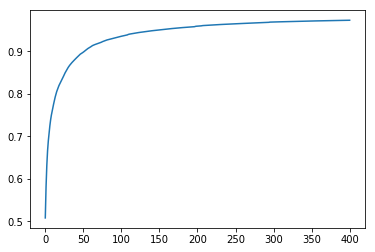

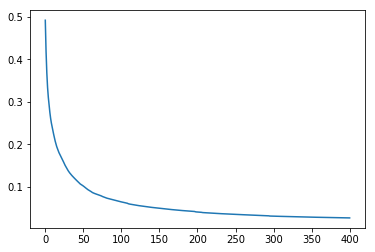

 20%|██        | 401/2000 [05:10<20:39,  1.29it/s]

S(g)
[ 0.26544893] [ 0.73455107]
¬S(g)
[ 0.73455107] [ 0.26544893]
F(c, d)
[ 0.10433829] [ 0.89566171]
¬F(a, d)
[ 0.12076676] [ 0.87923324]
4


 25%|██▌       | 500/2000 [06:13<18:39,  1.34it/s]

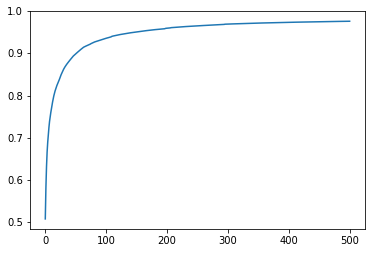

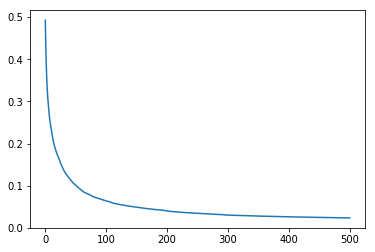

 25%|██▌       | 501/2000 [06:14<18:39,  1.34it/s]

S(g)
[ 0.2560811] [ 0.7439189]
¬S(g)
[ 0.7439189] [ 0.2560811]
¬F(a, d)
[ 0.10001671] [ 0.89998329]
3


 30%|███       | 600/2000 [07:32<17:35,  1.33it/s]

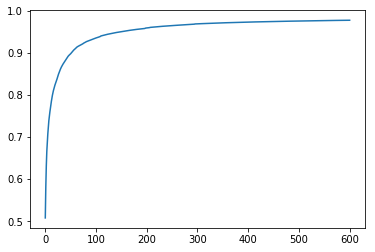

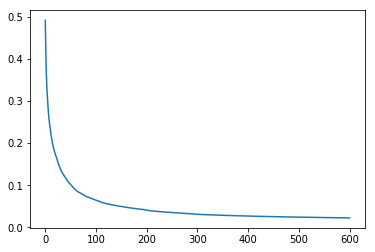

 30%|███       | 601/2000 [07:33<17:36,  1.32it/s]

S(g)
[ 0.24937803] [ 0.75062197]
¬S(g)
[ 0.75062197] [ 0.24937803]
2


 35%|███▌      | 700/2000 [08:49<16:22,  1.32it/s]

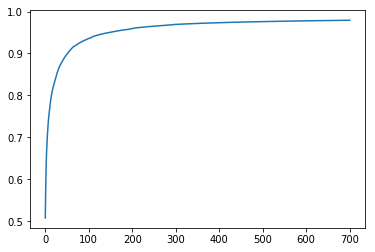

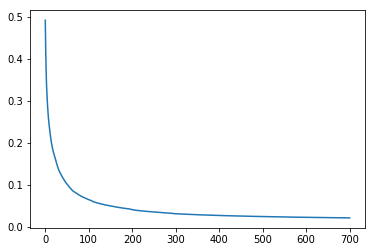

 35%|███▌      | 701/2000 [08:50<16:23,  1.32it/s]

S(g)
[ 0.24629813] [ 0.75370187]
¬S(g)
[ 0.75370187] [ 0.24629813]
2


 40%|████      | 800/2000 [10:08<15:13,  1.31it/s]

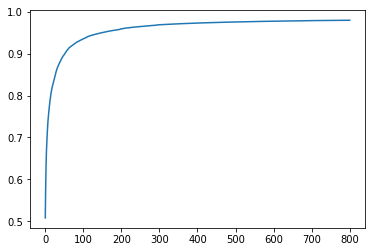

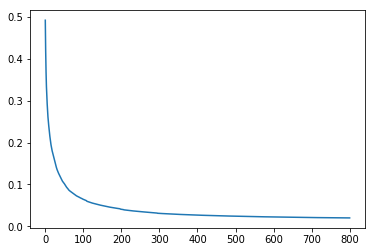

 40%|████      | 801/2000 [10:10<15:13,  1.31it/s]

S(g)
[ 0.24746436] [ 0.75253564]
¬S(g)
[ 0.75253564] [ 0.24746436]
2


 45%|████▌     | 900/2000 [11:27<14:00,  1.31it/s]

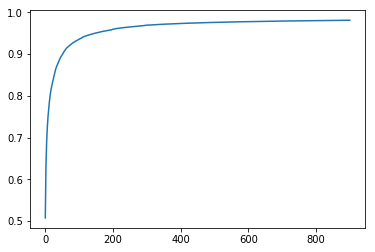

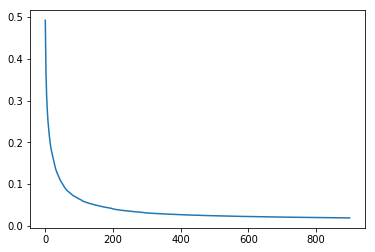

 45%|████▌     | 901/2000 [11:28<13:59,  1.31it/s]

S(g)
[ 0.25164735] [ 0.74835265]
¬S(g)
[ 0.74835265] [ 0.25164735]
2


 50%|█████     | 1000/2000 [12:44<12:44,  1.31it/s]

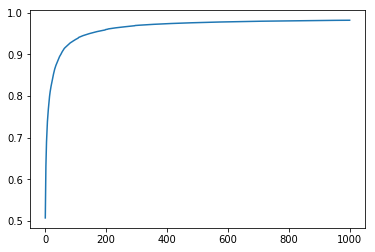

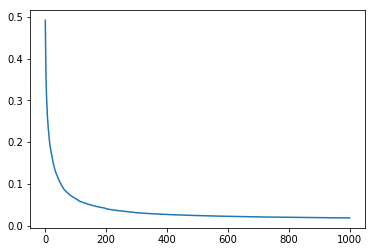

 50%|█████     | 1001/2000 [12:45<12:44,  1.31it/s]

S(g)
[ 0.24753726] [ 0.75246274]
¬S(g)
[ 0.75246274] [ 0.24753726]
2


 55%|█████▌    | 1100/2000 [13:59<11:26,  1.31it/s]

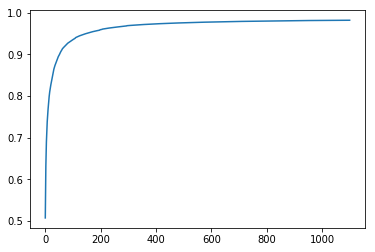

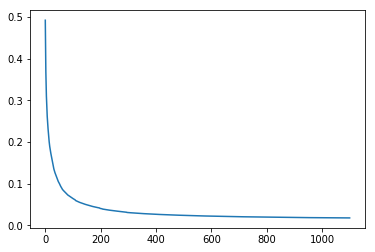

 55%|█████▌    | 1101/2000 [14:00<11:26,  1.31it/s]

S(g)
[ 0.242621] [ 0.757379]
¬S(g)
[ 0.757379] [ 0.242621]
2


 60%|██████    | 1200/2000 [15:13<10:08,  1.31it/s]

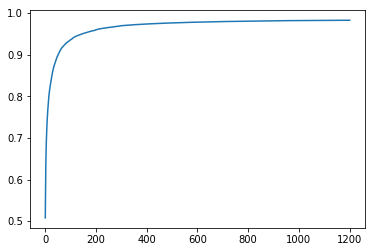

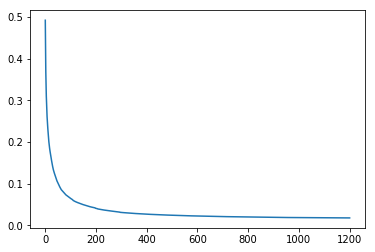

 60%|██████    | 1201/2000 [15:14<10:08,  1.31it/s]

S(g)
[ 0.23792344] [ 0.76207656]
¬S(g)
[ 0.76207656] [ 0.23792344]
2


 65%|██████▌   | 1300/2000 [16:27<08:51,  1.32it/s]

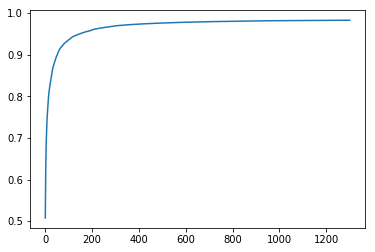

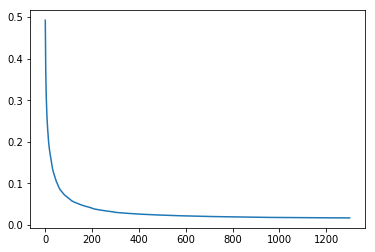

 65%|██████▌   | 1301/2000 [16:28<08:50,  1.32it/s]

S(g)
[ 0.23350042] [ 0.76649958]
¬S(g)
[ 0.76649958] [ 0.23350042]
2


 70%|███████   | 1400/2000 [17:38<07:33,  1.32it/s]

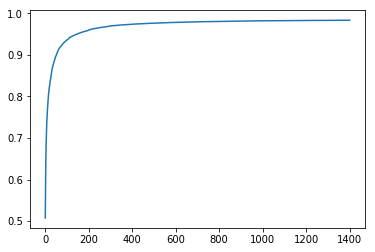

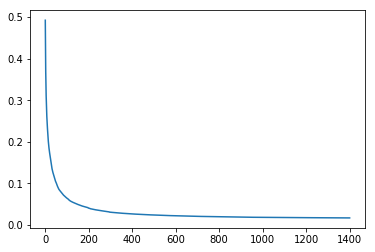

 70%|███████   | 1401/2000 [17:39<07:33,  1.32it/s]

S(g)
[ 0.22964036] [ 0.77035964]
¬S(g)
[ 0.77035964] [ 0.22964036]
2


 72%|███████▏  | 1444/2000 [18:12<07:00,  1.32it/s]

KeyboardInterrupt: 

In [5]:
ltn1=LTN(emb_dim,'abcdefghijklmn',[['S',1],['F',2],['C',1]],CLTN=False)
kb_train=kb1.union(kb2)
optimizor=torch.optim.Adam(ltn1.parameters(),lr=0.001)
mone=torch.FloatTensor([-1])
one=torch.FloatTensor([1])
average_prob=[]
averate_loss=[]
for i in tqdm(range(2000)):
    optimizor.zero_grad()
    total_probability=0.0
    total_loss=0.0
    for clause in kb_train.clauses:
        loss,prob=ltn1.forward(clause=clause)
        loss.backward(one)
        total_probability+=prob.data.numpy()[0]
        total_loss+=loss.data.numpy()[0]
    optimizor.step()
    average_prob.append(total_probability/len(kb_train.clauses))
    averate_loss.append(total_loss/len(kb_train.clauses))
    
    if i%100==0:
        plt.plot(average_prob)
        plt.show()
        plt.plot(averate_loss)
        plt.show()
        show_results(ltn1, kb_train)

In [7]:
get_DF(ltn1,'abcdefgh')

NameError: name 'ltn1' is not defined

In [51]:
get_DF(ltn1,'ijklmn')

,S,C,i,j,k,l,m,n
i,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00
j,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
k,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
l,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
m,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
n,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
show_learned_propositionals(ltn1,propositionals)

In [67]:
a.t().mm(a).size()

torch.Size([10, 10])

  0%|          | 0/2000 [00:00<?, ?it/s]

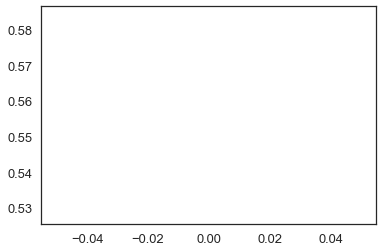

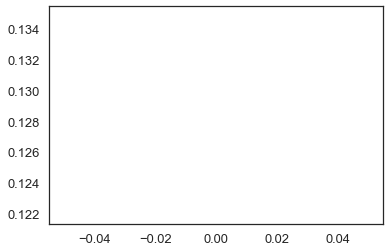

S(a)
[ 0.43354726] [ 0.56645274]
S(e)
[ 0.43543226] [ 0.56456774]
S(f)
[ 0.3339721] [ 0.6660279]
S(g)
[ 0.51830065] [ 0.48169938]
¬S(b)
[ 0.30088347] [ 0.69911653]
¬S(c)
[ 0.34881759] [ 0.65118241]
¬S(d)
[ 0.36606777] [ 0.63393223]
¬S(g)
[ 0.48169935] [ 0.51830065]
¬S(h)
[ 0.3474009] [ 0.6525991]
F(a, b)
[ 0.38180321] [ 0.61819679]
F(a, e)
[ 0.36524791] [ 0.63475209]
F(a, f)
[ 0.45514679] [ 0.54485321]
F(a, g)
[ 0.2567203] [ 0.7432797]
F(b, c)
[ 0.61547822] [ 0.38452178]
F(c, d)
[ 0.39770198] [ 0.60229802]
F(e, f)
[ 0.44897556] [ 0.55102444]
F(g, h)
[ 0.43507785] [ 0.56492215]
¬F(a, c)
[ 0.57141542] [ 0.42858458]
¬F(a, d)
[ 0.60857475] [ 0.39142525]
¬F(a, h)
[ 0.5290131] [ 0.4709869]
¬F(b, d)
[ 0.41737491] [ 0.58262509]
¬F(b, e)
[ 0.47150886] [ 0.52849114]
¬F(b, f)
[ 0.48921919] [ 0.51078081]
¬F(b, g)
[ 0.51737648] [ 0.48262352]
¬F(b, h)
[ 0.49353218] [ 0.50646782]
¬F(c, e)
[ 0.51151061] [ 0.48848939]
¬F(c, f)
[ 0.55969119] [ 0.44030881]
¬F(c, g)
[ 0.56144643] [ 0.43855357]
¬F(c, h)
[ 

  0%|          | 1/2000 [00:02<1:16:21,  2.29s/it]

67


  5%|▌         | 100/2000 [01:33<29:31,  1.07it/s]

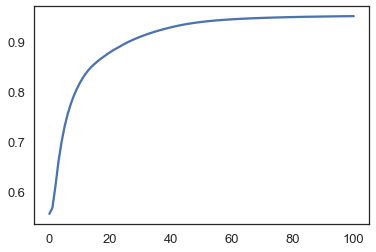

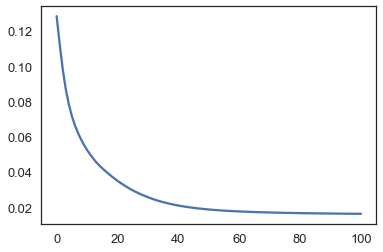

S(g)
[ 0.99114585] [ 0.00885417]
F(b, c)
[ 0.9949671] [ 0.00503292]
F(c, d)
[ 0.99789703] [ 0.00210296]
F(g, h)
[ 0.99775398] [ 0.00224603]
¬F(a, a)
[ 0.12455543] [ 0.00355655]
F(c, a) ∨ F(c, b) ∨ F(c, c) ∨ F(c, d) ∨ F(c, e) ∨ F(c, f) ∨ F(c, g) ∨ F(c, h)
[ 0.12437089] [ 0.00503292]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12459985] [ 0.0032012]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12469821] [ 0.00241431]


  5%|▌         | 101/2000 [01:34<29:40,  1.07it/s]

¬S(f) ∨ C(f)
[ 0.1245174] [ 0.00386077]
9


 10%|█         | 200/2000 [03:27<31:08,  1.04s/it]

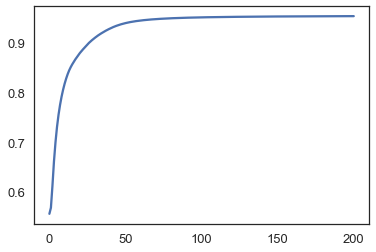

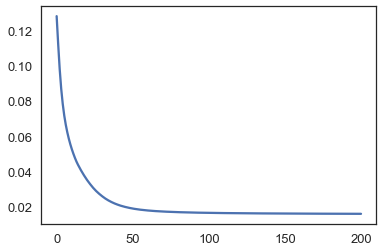

S(g)
[ 0.996777] [ 0.00322301]
F(b, c)
[ 0.99670267] [ 0.0032973]
F(c, d)
[ 0.99913853] [ 0.00086146]
F(g, h)
[ 0.99902761] [ 0.00097237]
¬F(a, a)
[ 0.12484645] [ 0.00122839]
F(c, a) ∨ F(c, b) ∨ F(c, c) ∨ F(c, d) ∨ F(c, e) ∨ F(c, f) ∨ F(c, g) ∨ F(c, h)
[ 0.12458783] [ 0.0032973]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12487894] [ 0.00096844]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12487845] [ 0.00097237]


 10%|█         | 201/2000 [03:29<31:12,  1.04s/it]

¬S(f) ∨ C(f)
[ 0.12481727] [ 0.00146186]
9


 15%|█▌        | 300/2000 [05:21<30:21,  1.07s/it]

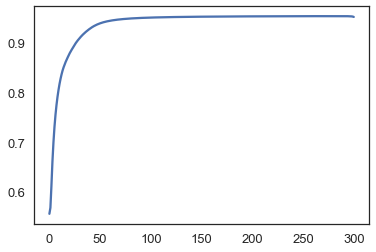

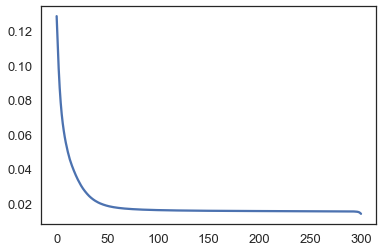

S(g)
[ 0.99828774] [ 0.00171227]
F(b, c)
[ 0.27459443] [ 0.72540557]
F(c, d)
[ 0.99925965] [ 0.00074036]
F(g, h)
[ 0.9994992] [ 0.00050078]
¬F(a, a)
[ 0.1248806] [ 0.00095516]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12490746] [ 0.00074036]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12491735] [ 0.00066117]


 15%|█▌        | 301/2000 [05:23<30:26,  1.08s/it]

¬S(f) ∨ C(f)
[ 0.12490771] [ 0.00073832]
8


 20%|██        | 400/2000 [07:11<28:46,  1.08s/it]

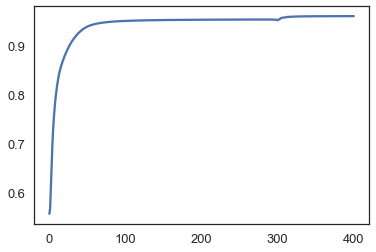

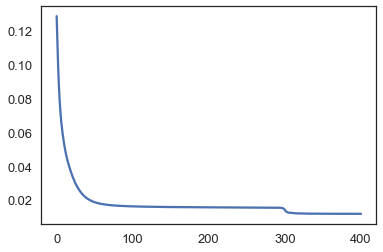

S(g)
[ 0.99889559] [ 0.00110443]
F(c, d)
[ 0.99966419] [ 0.00033584]
F(g, h)
[ 0.99977732] [ 0.0002227]
¬F(a, a)
[ 0.12494465] [ 0.0004428]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12495802] [ 0.00033584]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.124969] [ 0.00024804]


 20%|██        | 401/2000 [07:13<28:47,  1.08s/it]

¬S(f) ∨ C(f)
[ 0.12494468] [ 0.00044256]
7


 25%|██▌       | 500/2000 [08:47<26:23,  1.06s/it]

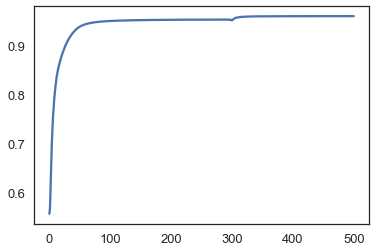

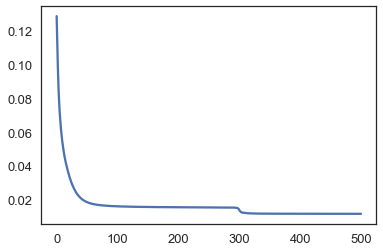

S(g)
[ 0.99921459] [ 0.00078538]
F(c, d)
[ 0.99977094] [ 0.00022907]
F(g, h)
[ 0.99984038] [ 0.00015962]
¬F(a, a)
[ 0.12496196] [ 0.00030434]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12497137] [ 0.00022907]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12497988] [ 0.00016093]


 25%|██▌       | 501/2000 [08:49<26:24,  1.06s/it]

¬S(f) ∨ C(f)
[ 0.12496298] [ 0.00029618]
7


 30%|███       | 600/2000 [11:04<25:49,  1.11s/it]

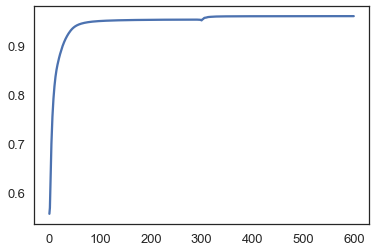

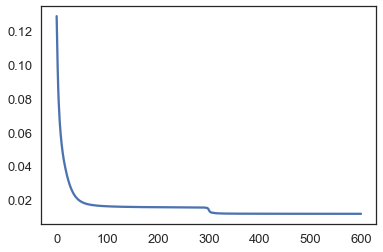

S(g)
[ 0.99943191] [ 0.00056812]
F(c, d)
[ 0.99982172] [ 0.00017831]
F(g, h)
[ 0.99987596] [ 0.00012406]
¬F(a, a)
[ 0.12497056] [ 0.0002355]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12497771] [ 0.00017831]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.1249845] [ 0.00012406]
¬S(f) ∨ C(f)
[ 0.12497359] [ 0.0002113]


 30%|███       | 601/2000 [11:08<25:56,  1.11s/it]

7


 35%|███▌      | 700/2000 [13:11<24:30,  1.13s/it]

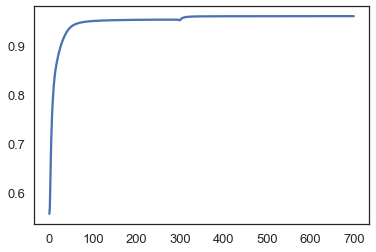

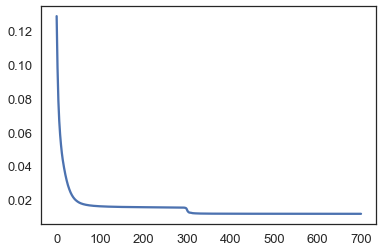

S(g)
[ 0.999569] [ 0.00043102]
F(c, d)
[ 0.99985319] [ 0.00014682]
F(g, h)
[ 0.99989843] [ 0.00010158]
¬F(a, a)
[ 0.12497625] [ 0.00018996]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12498165] [ 0.00014682]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.1249873] [ 0.00010158]


 35%|███▌      | 701/2000 [13:13<24:30,  1.13s/it]

¬S(f) ∨ C(f)
[ 0.12498029] [ 0.00015771]
7


 40%|████      | 800/2000 [15:01<22:32,  1.13s/it]

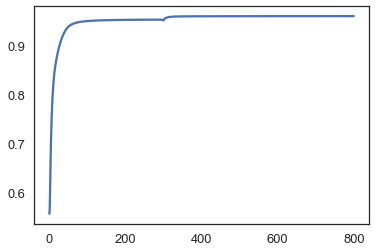

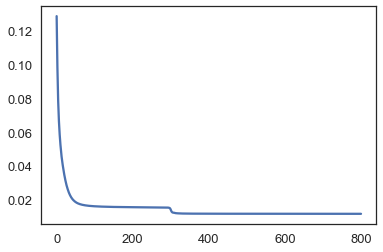

S(g)
[ 0.99966419] [ 0.00033582]
F(c, d)
[ 0.99987435] [ 0.00012564]
F(g, h)
[ 0.99991465] [  8.53281890e-05]
¬F(a, a)
[ 0.12498051] [ 0.00015593]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12498429] [ 0.00012564]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12498933] [  8.53282691e-05]
¬S(f) ∨ C(f)
[ 0.12498473] [ 0.00012219]


 40%|████      | 801/2000 [15:03<22:32,  1.13s/it]

7


 45%|████▌     | 900/2000 [16:51<20:36,  1.12s/it]

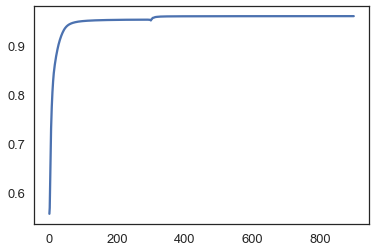

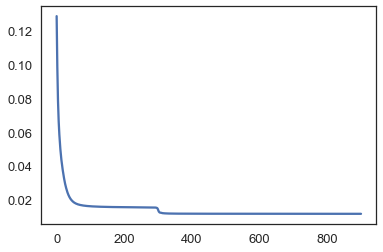

S(g)
[ 0.99973148] [ 0.00026851]
F(c, d)
[ 0.99988848] [ 0.00011154]
F(g, h)
[ 0.99992692] [  7.30837564e-05]
¬F(a, a)
[ 0.12498358] [ 0.00013137]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12498606] [ 0.00011154]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499087] [  7.30836837e-05]
¬S(f) ∨ C(f)
[ 0.12498793] [  9.65595245e-05]


 45%|████▌     | 901/2000 [16:53<20:36,  1.13s/it]

7


 50%|█████     | 1000/2000 [18:29<18:29,  1.11s/it]

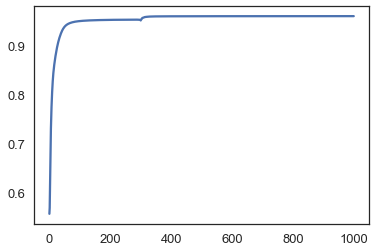

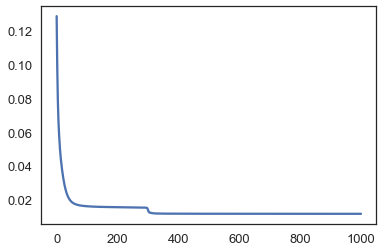

S(g)
[ 0.99977946] [ 0.00022055]
F(c, d)
[ 0.99989974] [ 0.00010025]
F(g, h)
[ 0.99993616] [  6.38125202e-05]
¬F(a, a)
[ 0.12498587] [ 0.00011301]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12498747] [ 0.00010025]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499202] [  6.38125202e-05]
¬S(f) ∨ C(f)
[ 0.12499027] [  7.78436661e-05]


 50%|█████     | 1001/2000 [18:31<18:29,  1.11s/it]

7


 55%|█████▌    | 1100/2000 [20:27<16:44,  1.12s/it]

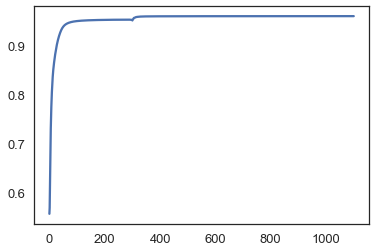

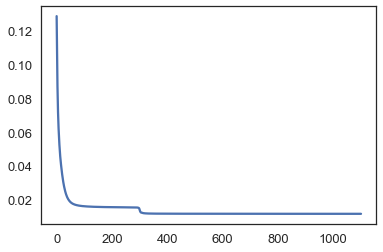

S(g)
[ 0.99981517] [ 0.00018481]
F(c, d)
[ 0.99990875] [  9.12791802e-05]
F(g, h)
[ 0.99994373] [  5.62700079e-05]
¬F(a, a)
[ 0.1249878] [  9.76324081e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12498859] [  9.12791802e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499297] [  5.62700079e-05]
¬S(f) ∨ C(f)
[ 0.124992] [  6.40153885e-05]


 55%|█████▌    | 1101/2000 [20:31<16:45,  1.12s/it]

7


 60%|██████    | 1200/2000 [22:12<14:48,  1.11s/it]

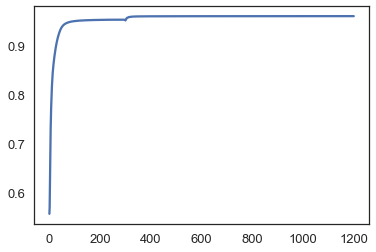

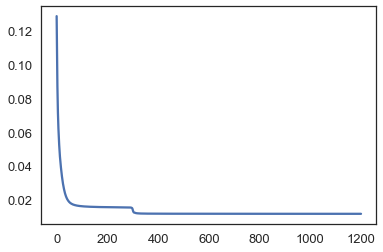

S(g)
[ 0.999843] [ 0.00015701]
F(c, d)
[ 0.99991572] [  8.42629452e-05]
F(g, h)
[ 0.99995005] [  4.99261914e-05]
¬F(a, a)
[ 0.12498935] [  8.52346420e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12498946] [  8.42629452e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499376] [  4.99261441e-05]


 60%|██████    | 1201/2000 [22:14<14:47,  1.11s/it]

¬S(f) ∨ C(f)
[ 0.12499332] [  5.34057617e-05]
7


 65%|██████▌   | 1300/2000 [23:57<12:54,  1.11s/it]

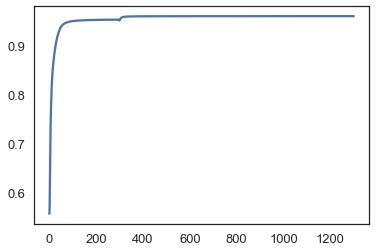

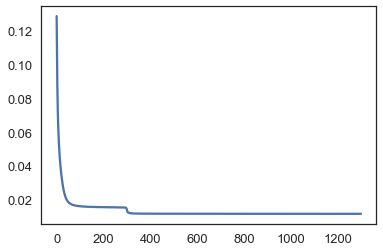

S(g)
[ 0.99986517] [ 0.00013484]
F(c, d)
[ 0.9999215] [  7.85143711e-05]
F(g, h)
[ 0.99995518] [  4.48210085e-05]
¬F(a, a)
[ 0.12499063] [  7.49826431e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12499019] [  7.85143711e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.1249944] [  4.48210085e-05]


 65%|██████▌   | 1301/2000 [23:59<12:53,  1.11s/it]

¬S(f) ∨ C(f)
[ 0.12499437] [  4.50611115e-05]
7


 70%|███████   | 1400/2000 [25:31<10:56,  1.09s/it]

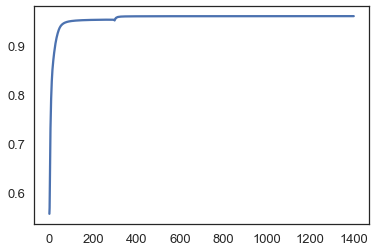

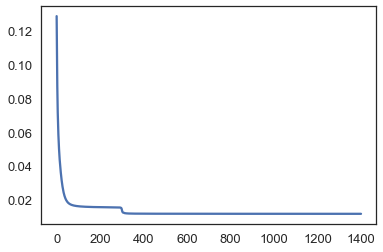

S(g)
[ 0.999883] [ 0.00011702]
F(c, d)
[ 0.99992639] [  7.35962531e-05]
F(g, h)
[ 0.99995929] [  4.06832842e-05]
¬F(a, a)
[ 0.12499167] [  6.66379929e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.1249908] [  7.35962531e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499491] [  4.06832842e-05]
¬S(f) ∨ C(f)
[ 0.12499519] [  3.85046005e-05]


 70%|███████   | 1401/2000 [25:34<10:55,  1.09s/it]

7


 75%|███████▌  | 1500/2000 [27:11<09:03,  1.09s/it]

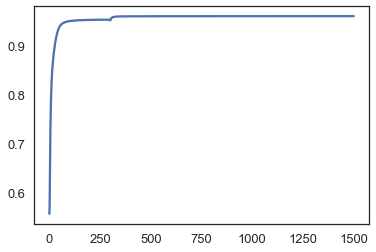

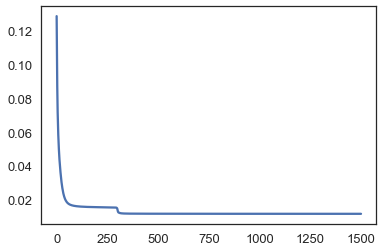

S(g)
[ 0.9998976] [ 0.00010241]
F(c, d)
[ 0.99993014] [  6.98780277e-05]
F(g, h)
[ 0.99996275] [  3.72476097e-05]
¬F(a, a)
[ 0.12499258] [  5.93662262e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12499127] [  6.98781005e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499534] [  3.72476097e-05]


 75%|███████▌  | 1501/2000 [27:13<09:02,  1.09s/it]

¬S(f) ∨ C(f)
[ 0.12499586] [  3.31401825e-05]
7


 80%|████████  | 1600/2000 [29:10<07:17,  1.09s/it]

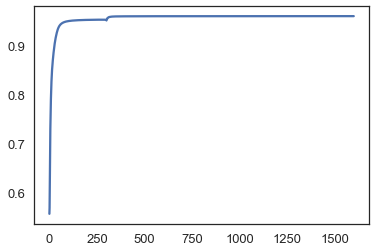

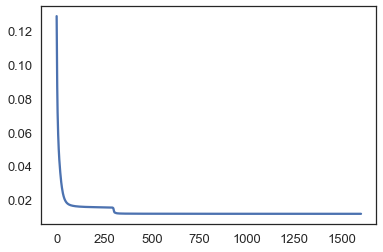

S(g)
[ 0.99990994] [  9.00442028e-05]
F(c, d)
[ 0.99993271] [  6.72691313e-05]
F(g, h)
[ 0.99996573] [  3.42534295e-05]
¬F(a, a)
[ 0.12499332] [  5.34057617e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12499159] [  6.72691313e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499572] [  3.42534295e-05]


 80%|████████  | 1601/2000 [29:12<07:16,  1.09s/it]

¬S(f) ∨ C(f)
[ 0.12499639] [  2.88486481e-05]
7


 85%|████████▌ | 1700/2000 [30:49<05:26,  1.09s/it]

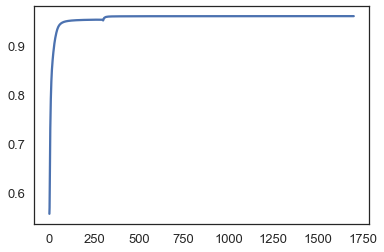

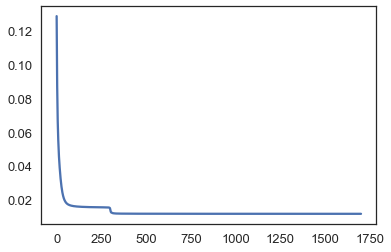

S(g)
[ 0.99992025] [  7.97288740e-05]
F(c, d)
[ 0.99993354] [  6.64798936e-05]
F(g, h)
[ 0.99996823] [  3.17744489e-05]
¬F(a, a)
[ 0.12499391] [  4.87565994e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12499169] [  6.64798281e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499603] [  3.17744489e-05]


 85%|████████▌ | 1701/2000 [30:51<05:25,  1.09s/it]

¬S(f) ∨ C(f)
[ 0.12499684] [  2.52723694e-05]
7


 90%|█████████ | 1800/2000 [32:33<03:37,  1.09s/it]

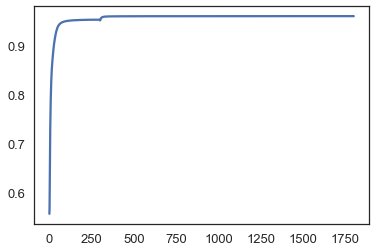

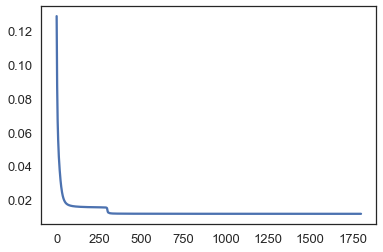

S(g)
[ 0.99992901] [  7.10054519e-05]
F(c, d)
[ 0.99993193] [  6.80428711e-05]
F(g, h)
[ 0.99997038] [  2.96040889e-05]
¬F(a, a)
[ 0.1249944] [  4.48226929e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12499149] [  6.80428711e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.1249963] [  2.96040616e-05]


 90%|█████████ | 1801/2000 [32:35<03:36,  1.09s/it]

¬S(f) ∨ C(f)
[ 0.12499723] [  2.21729279e-05]
7


 95%|█████████▌| 1900/2000 [34:24<01:48,  1.09s/it]

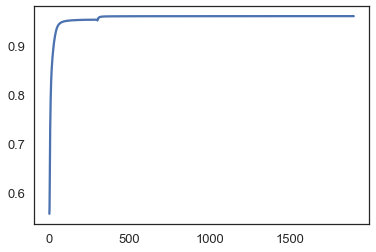

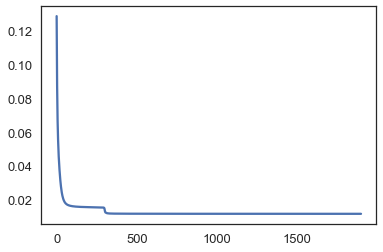

S(g)
[ 0.99993646] [  6.35395190e-05]
F(c, d)
[ 0.99992651] [  7.35031135e-05]
F(g, h)
[ 0.99997222] [  2.77574745e-05]
¬F(a, a)
[ 0.12499481] [  4.14848328e-05]
F(d, a) ∨ F(d, b) ∨ F(d, c) ∨ F(d, d) ∨ F(d, e) ∨ F(d, f) ∨ F(d, g) ∨ F(d, h)
[ 0.12499081] [  7.35031135e-05]
F(h, a) ∨ F(h, b) ∨ F(h, c) ∨ F(h, d) ∨ F(h, e) ∨ F(h, f) ∨ F(h, g) ∨ F(h, h)
[ 0.12499653] [  2.77574982e-05]
¬S(f) ∨ C(f)
[ 0.12499754] [  1.96695328e-05]


 95%|█████████▌| 1901/2000 [34:26<01:47,  1.09s/it]

7


100%|██████████| 2000/2000 [35:59<00:00,  1.08s/it]


In [12]:
kb_train=kb1.union(kb2).union(gkb3).union(gkb4)
ltn2=LTN(emb_dim,'abcdefghijklmn',[['S',1],['F',2],['C',1]],CLTN=True)
optimizor=torch.optim.Adam(ltn2.parameters(),lr=0.001)
mone=torch.FloatTensor([-1])
one=torch.FloatTensor([1])
average_prob2=[]
average_loss2=[]
for i in tqdm(range(2000)):
    optimizor.zero_grad()
    total_probability=0.0
    total_loss=0.0
    for clause in kb_train.clauses:
        loss,prob=ltn2.forward(clause=clause)
        loss.backward(one)
        total_probability+=prob.data.numpy()[0]
        total_loss+=loss.data.numpy()[0]
    optimizor.step()
    average_prob2.append(total_probability/len(kb_train.clauses))
    average_loss2.append(total_loss/len(kb_train.clauses))
    if i%100==0:
        plt.plot(average_prob2)
        plt.show()
        plt.plot(average_loss2)
        plt.show()
        show_results(ltn2,kb_train2)

In [55]:
get_DF(ltn1,'abcdefgh')

/Users/sunxiaofei/anaconda3/lib/python3.6/site-packages/torch/autograd/_functions/basic_ops.py:48: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return a.mul(b)


,S,C,a,b,c,d,e,f,g,h
a,0.99,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
b,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
c,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
d,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
e,0.99,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
f,0.98,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
g,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
h,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [53]:
ltn1.Constants.forward('a')

Variable containing:
 0.0837  0.0006 -0.2070 -0.0008  0.2650  0.0007 -0.2235 -0.0005  0.1580  0.0002
[torch.FloatTensor of size 1x10]

In [58]:
ltn1.Predicates['F'].conv[0].weight

Parameter containing:
(0 ,0 ,.,.) = 
1.00000e-03 *
  -0.0105  5.8030  0.0131 -2.4624
  -0.0093  5.1303  0.0111 -2.1133
   0.0011 -0.5820 -0.0015  0.2873

(1 ,0 ,.,.) = 
1.00000e-03 *
  -0.0110  5.9128  0.0135 -2.5726
  -0.0096  5.3519  0.0115 -2.2103
   0.0011 -0.6167 -0.0015  0.3197
[torch.FloatTensor of size 2x1x3x4]

In [51]:
get_DF(ltn1,'ijklmn')

,S,C,i,j,k,l,m,n
i,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00
j,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
k,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
l,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
m,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00
n,0.97,0.02,0.00,0.00,0.00,0.00,0.00,0.00


In [112]:
get_DF(ltn2,'abcdefgh')

,S,C,a,b,c,d,e,f,g,h
a,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00
b,0.00,0.00,1.00,0.05,1.00,0.00,0.00,0.00,0.00,0.00
c,0.00,0.00,0.00,1.00,0.93,1.00,0.00,0.00,0.00,0.00
d,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
e,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
f,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.01,0.00,0.00
g,0.49,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.10,1.00
h,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [16]:
get_DF(ltn2,'ijklmn')

NameError: name 'get_DF' is not defined

In [101]:
def get_accuracy(model,kb):
    results=[]
    for clause in kb.clauses:
        o1,o2=model.forward(clause)
        if o2.data.numpy()[0][0]>0.9:
            results.append(1.0)
        else:
            results.append(0.0)

    return sum(results)/len(kb.clauses)

In [102]:
def show_learned_propositionals(model,propositionals):
    results=pd.DataFrame(index=range(len(propositionals)),columns=['Propositional','Group1','Group2'])
    for i,propositional in enumerate(propositionals):
        total=0
        true_count=0
        kkk1=propositional.generate_knowledge_base('abcdefgh')
        kkk2=propositional.generate_knowledge_base('ijklmn')
        a1=get_accuracy(model,kkk1)
        a2=get_accuracy(model,kkk2)
        results.iloc[i]=dict(Propositional=propositional.clause.show(),Group1=a1,Group2=a2)
    return results

In [114]:
show_learned_propositionals(ltn1,propositionals)

,Propositional,Group1,Group2
0,"¬F(x, x)",0.875,0.666667
1,"¬F(x, y) ∨ F(y, x)",1,0.972222
2,"F(x, y)",1,1
3,"¬S(x) ∨ ¬F(x, y) ∨ S(y)",0.96875,0.916667
4,¬S(x) ∨ C(x),0.875,0.666667


In [115]:
show_learned_propositionals(ltn2,propositionals)

,Propositional,Group1,Group2
0,"¬F(x, x)",0.625,0.5
1,"¬F(x, y) ∨ F(y, x)",0.984375,0.916667
2,"F(x, y)",1,1
3,"¬S(x) ∨ ¬F(x, y) ∨ S(y)",0.9375,0.916667
4,¬S(x) ∨ C(x),0.75,0.666667


In [265]:
class Test(nn.Module):
    def __init__(self):
        super(Test, self).__init__()
        self.W=nn.Parameter(torch.randn(10, 10, 10))
    def forward(self, embs, negation):
        pass

In [295]:
a=nn.Bilinear(20,20,10,bias=False)

In [298]:
input1=Variable(torch.randn(1, 20))
input2=Variable(torch.randn(1, 20))
a(input1,input2)

Variable containing:
-2.8624  0.1028 -0.7835  2.1155 -0.1974  2.5639  4.0751  0.9362 -6.3984  0.9882
[torch.FloatTensor of size 1x10]

In [10]:
prob,loss,first,second,best_table1,best_table2,best_table3=pickle.load(open('./results/result2.pkl','rb'),encoding='latin1')

In [13]:
best_table3

,Propositional,Group1,Group2
0,"¬F(x, x)",0.75,0.666667
1,"¬F(x, y) ∨ F(y, x)",0.984375,0.944444
2,"F(x, y)",1,1
3,"¬S(x) ∨ ¬F(x, y) ∨ S(y)",0.953125,0.916667
4,¬S(x) ∨ C(x),0.75,0.666667
